In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/hp/Downloads/Studies/Data Mining/cp2/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv")

In [3]:
data.shape

(2622133, 38)

In [4]:
data

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,27775.54,9819.99
2622131,2622131,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,NaN,NaN,NaN,NaN,NaN,0,Y,Y,11738.58,3295.21


In [5]:
print(data.isnull().sum())

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

<AxesSubplot:>

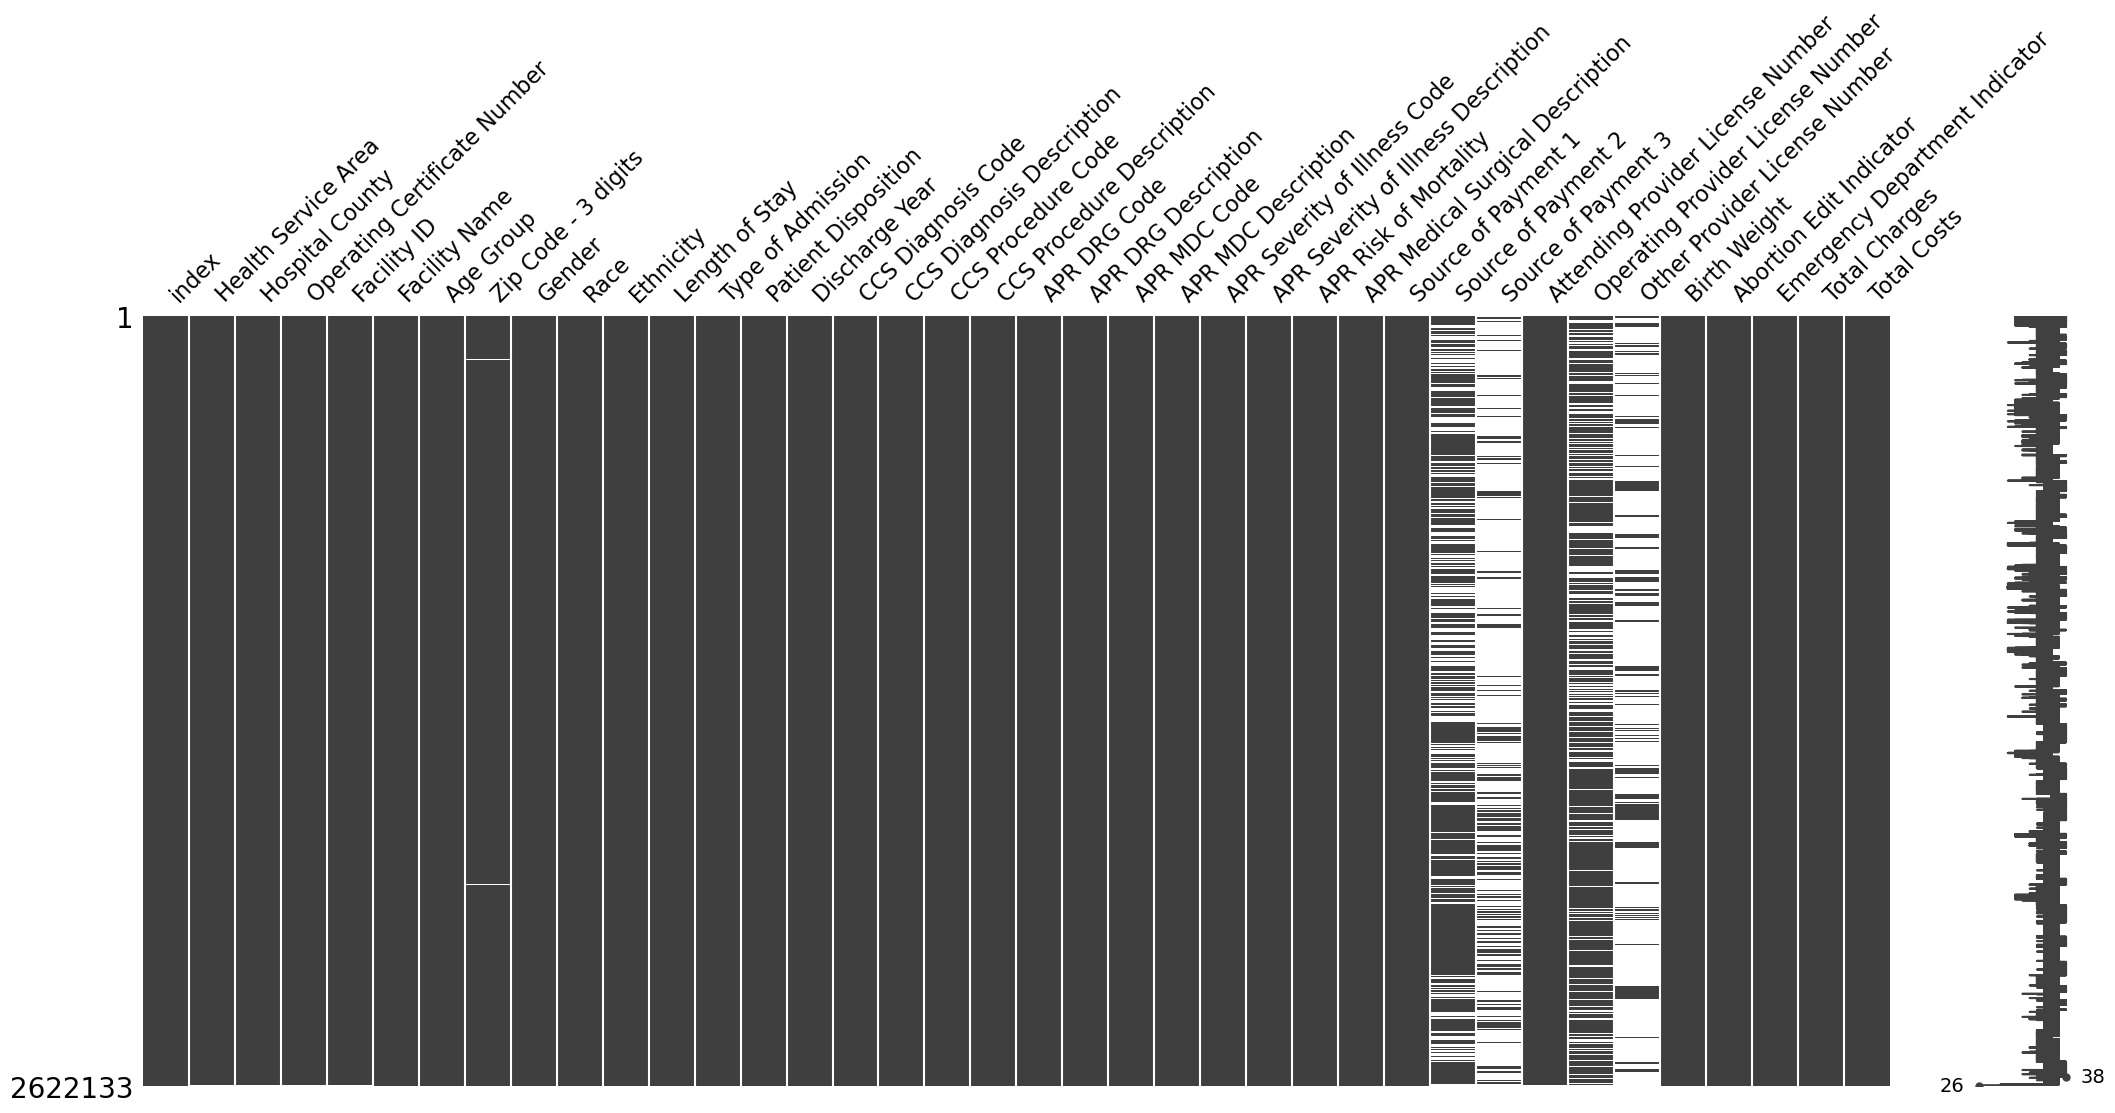

In [6]:
msno.matrix(data)

In [7]:
data.nunique()

index                                  2622133
Health Service Area                          8
Hospital County                             57
Operating Certificate Number               189
Facility ID                                225
Facility Name                              225
Age Group                                    5
Zip Code - 3 digits                         78
Gender                                       3
Race                                         4
Ethnicity                                    3
Length of Stay                             222
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         262
CCS Diagnosis Description                  262
CCS Procedure Code                         232
CCS Procedure Description                  232
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code 

In [8]:
data.drop(['Discharge Year', 'index'],axis=1,inplace = True)

In [9]:
for i in data.columns:
    if len(data[i].unique()):
        print(data[i].value_counts())
        print()
        print()

New York City     1233121
Long Island        385262
Hudson Valley      273037
Western NY         185080
Capital/Adiron     179929
Central NY         170912
Finger Lakes       158605
Southern Tier       31300
Name: Health Service Area, dtype: int64


Manhattan      445288
Kings          298247
Queens         221325
Nassau         215831
Bronx          204328
Suffolk        169431
Westchester    131946
Erie           129617
Monroe         109402
Onondaga        76289
Richmond        63933
Albany          62192
Orange          42955
Oneida          36454
Dutchess        35424
Rockland        34898
Broome          29078
Schenectady     22989
Niagara         21450
Chemung         17366
Warren          17134
Rensselaer      15636
Otsego          14305
Ulster          13933
St Lawrence     13601
Chautauqua      13463
Ontario         13057
Jefferson       12111
Clinton         11589
Saratoga         9931
Steuben          9678
Putnam           8093
Cattaraugus      7686
Montgomery       6995
Os

Minor       974425
Moderate    962658
Major       530085
Extreme     154724
Name: APR Severity of Illness Description, dtype: int64


Minor       1644151
Moderate     554542
Major        300829
Extreme      122370
Name: APR Risk of Mortality, dtype: int64


Medical           2002344
Surgical           619548
Not Applicable        241
Name: APR Medical Surgical Description, dtype: int64


Medicare                     866859
Insurance Company            858687
Medicaid                     390237
Blue Cross                   337566
Self-Pay                     126243
Workers Compensation          15519
Other Non-Federal Program     10999
CHAMPUS                        9468
Other Federal Program          6505
Unknown                          50
Name: Source of Payment 1, dtype: int64


Medicaid                     580109
Self-Pay                     486614
Medicare                     326242
Insurance Company            239593
Blue Cross                   168306
CHAMPUS                    

<AxesSubplot:>

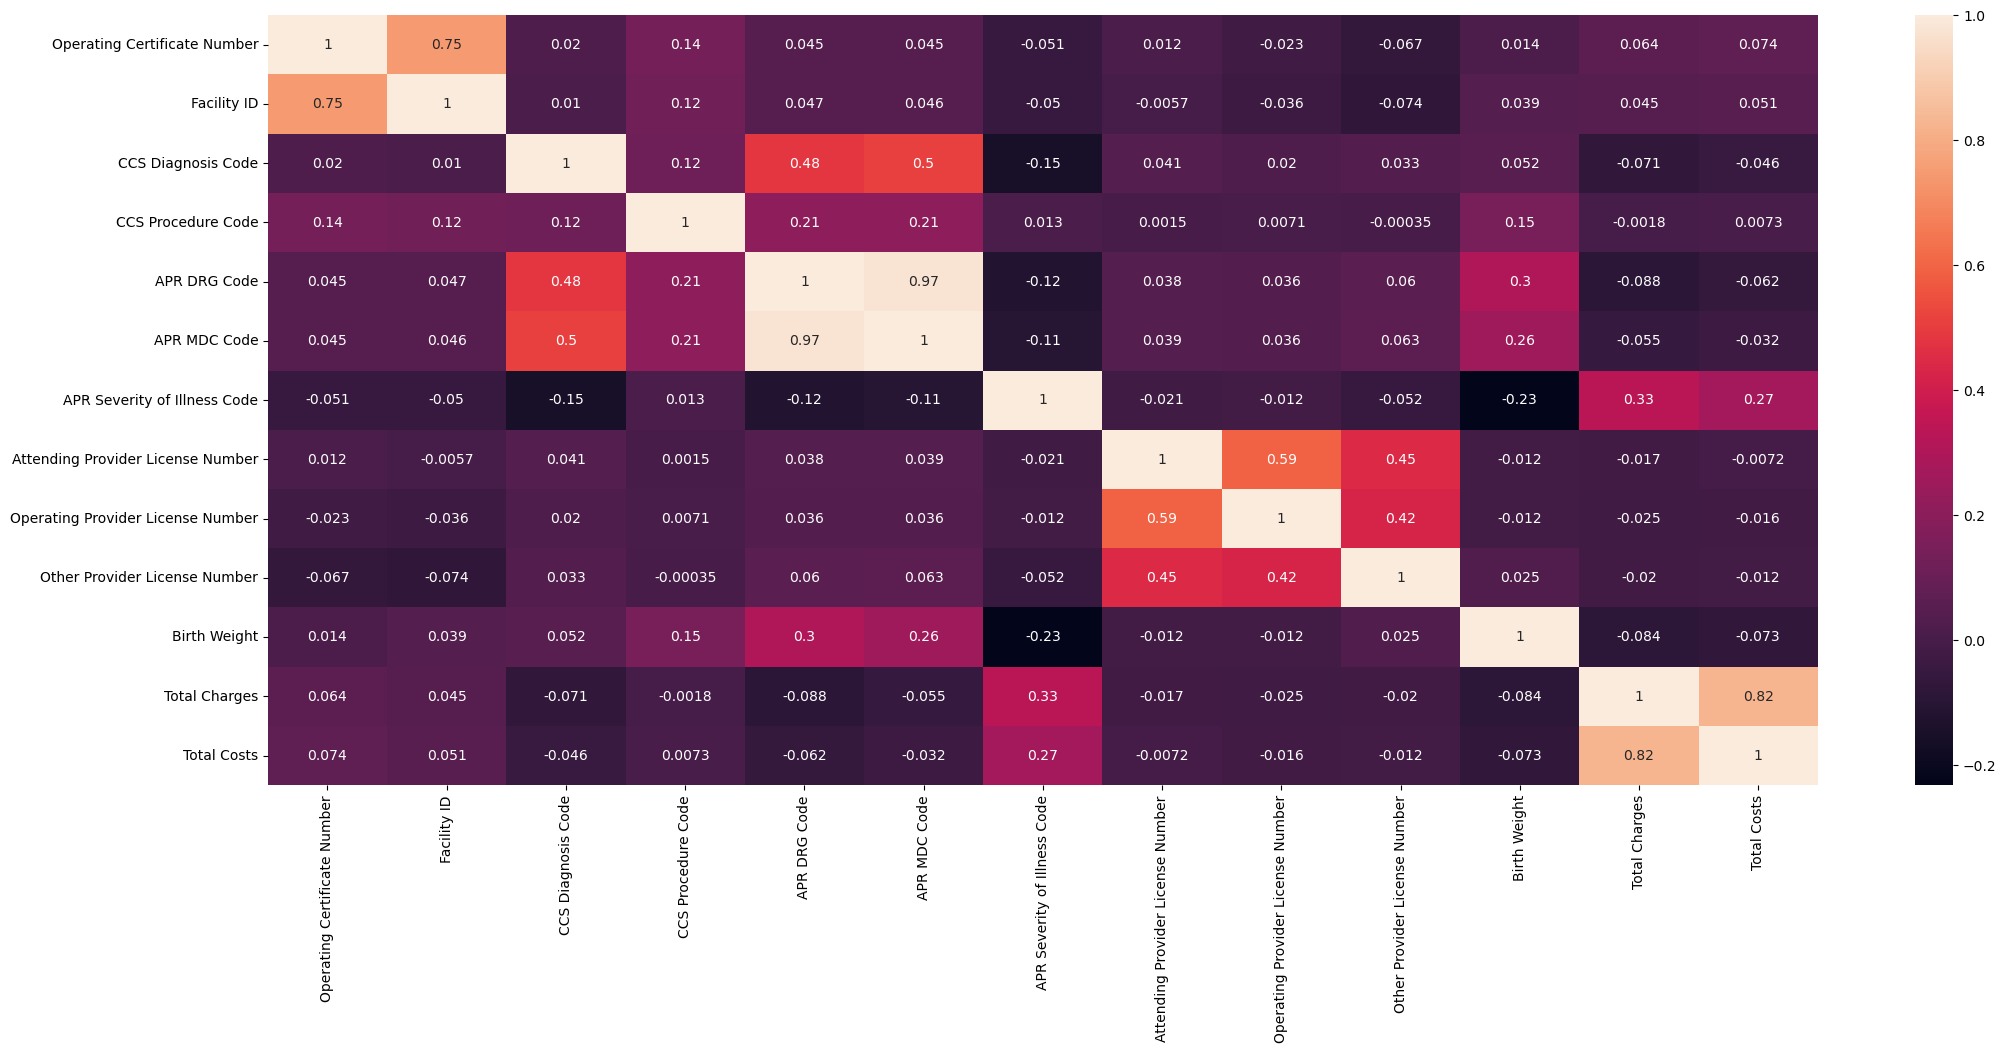

In [10]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 36 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility ID                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  CCS Diagnosis Code                   float64
 14  CCS Diagnosis Description            object 
 15  CCS Procedure Code              

In [12]:
data.describe()

,Operating Certificate Number,Facility ID,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,2.617246e+06,2.617246e+06,2.619860e+06,2.619860e+06,2.622133e+06,2.622133e+06,2.622133e+06,2.617246e+06,1.951315e+06,4.881420e+05,2.622133e+06,2.622133e+06,2.622133e+06
mean,5.019051e+06,1.036953e+03,1.919431e+02,1.121324e+02,4.069629e+02,1.016206e+01,1.948373e+00,1.266323e+06,1.569229e+06,2.213083e+06,3.103701e+02,2.945920e+04,1.186523e+04
std,2.249577e+06,6.448892e+02,1.565932e+02,8.761224e+01,2.404910e+02,5.923678e+00,8.986120e-01,8.226220e+06,9.379695e+06,1.225216e+07,9.769686e+02,5.640021e+04,2.727029e+04
min,1.010000e+05,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,1.060000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.666590e+05,1.644990e+05,1.662850e+05,0.000000e+00,7.900000e+03,3.290510e+03
50%,5.907002e+06,1.117000e+03,1.570000e+02,1.240000e+02,3.610000e+02,8.000000e+00,2.000000e+00,2.053620e+05,2.012870e+05,2.029570e+05,0.000000e+00,1.567373e+04,6.175350e+03
75%,7.002002e+06,1.450000e+03,2.180000e+02,2.110000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.335610e+05,2.305590e+05,2.335750e+05,0.000000e+00,3.172352e+04,1.222803e+04
max,7.004010e+06,9.059000e+03,6.700000e+02,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.100000e+07,9.900000e+03,1.206004e+07,1.470885e+07


In [13]:
data.drop(['Facility Name', 'CCS Diagnosis Description','CCS Procedure Description','APR DRG Description','APR MDC Description',
           'APR Severity of Illness Description'],axis=1,inplace = True)

In [14]:
print(data.isnull().sum())

Health Service Area                     4887
Hospital County                         4887
Operating Certificate Number            4887
Facility ID                             4887
Age Group                                  0
Zip Code - 3 digits                     3201
Gender                                     0
Race                                       0
Ethnicity                                  0
Length of Stay                             0
Type of Admission                          0
Patient Disposition                      103
CCS Diagnosis Code                      2273
CCS Procedure Code                      2273
APR DRG Code                               0
APR MDC Code                               0
APR Severity of Illness Code               0
APR Risk of Mortality                    241
APR Medical Surgical Description           0
Source of Payment 1                        0
Source of Payment 2                   810381
Source of Payment 3                  2040841
Attending 

In [15]:
data.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Age Group',
       'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [16]:
m_col = ['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Age Group',
       'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Attending Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs']
data.dropna(subset=m_col, axis=0, inplace=True)

In [17]:
print(data.isnull().sum())

Health Service Area                        0
Hospital County                            0
Operating Certificate Number               0
Facility ID                                0
Age Group                                  0
Zip Code - 3 digits                        0
Gender                                     0
Race                                       0
Ethnicity                                  0
Length of Stay                             0
Type of Admission                          0
Patient Disposition                        0
CCS Diagnosis Code                         0
CCS Procedure Code                         0
APR DRG Code                               0
APR MDC Code                               0
APR Severity of Illness Code               0
APR Risk of Mortality                      0
APR Medical Surgical Description           0
Source of Payment 1                        0
Source of Payment 2                   806770
Source of Payment 3                  2031681
Attending 

In [18]:
data.nunique()

Health Service Area                        8
Hospital County                           57
Operating Certificate Number             189
Facility ID                              225
Age Group                                  5
Zip Code - 3 digits                       78
Gender                                     3
Race                                       4
Ethnicity                                  3
Length of Stay                           219
Type of Admission                          6
Patient Disposition                       19
CCS Diagnosis Code                       260
CCS Procedure Code                       231
APR DRG Code                             313
APR MDC Code                              25
APR Severity of Illness Code               4
APR Risk of Mortality                      4
APR Medical Surgical Description           2
Source of Payment 1                       10
Source of Payment 2                       10
Source of Payment 3                       10
Attending 

In [19]:
data.drop(['Abortion Edit Indicator'],axis=1,inplace = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611433 entries, 5 to 2617245
Data columns (total 29 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                object 
 1   Hospital County                    object 
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Age Group                          object 
 5   Zip Code - 3 digits                object 
 6   Gender                             object 
 7   Race                               object 
 8   Ethnicity                          object 
 9   Length of Stay                     object 
 10  Type of Admission                  object 
 11  Patient Disposition                object 
 12  CCS Diagnosis Code                 float64
 13  CCS Procedure Code                 float64
 14  APR DRG Code                       int64  
 15  APR MDC Code                       int64  
 16  APR Severity of Il

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
data['Age Group'] = le.fit_transform(data['Age Group'])

In [23]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [24]:
le = LabelEncoder()
data['Race'] = le.fit_transform(data['Race'])

In [25]:
le = LabelEncoder()
data['Ethnicity'] = le.fit_transform(data['Ethnicity'])

In [26]:
le = LabelEncoder()
data['Type of Admission'] = le.fit_transform(data['Type of Admission'])

In [27]:
le = LabelEncoder()
data['Patient Disposition'] = le.fit_transform(data['Patient Disposition'])

In [28]:
le = LabelEncoder()
data['APR Risk of Mortality'] = le.fit_transform(data['APR Risk of Mortality'])

In [29]:
le = LabelEncoder()
data['Emergency Department Indicator'] = le.fit_transform(data['Emergency Department Indicator'])

In [30]:
le = LabelEncoder()
data['APR Medical Surgical Description'] = le.fit_transform(data['APR Medical Surgical Description'])

In [31]:
data.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,...,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
5,Capital/Adiron,Albany,101000.0,1.0,0,100.0,1,3,0,3,...,Insurance Company,Self-Pay,NaN,218155.0,NaN,NaN,0,0,8420.75,3246.34
6,Capital/Adiron,Albany,101000.0,1.0,0,100.0,1,3,0,4,...,Medicaid,Self-Pay,NaN,207219.0,207219.0,NaN,0,1,21090.63,6194.34
7,Capital/Adiron,Albany,101000.0,1.0,0,100.0,0,3,0,1,...,Insurance Company,Self-Pay,NaN,244921.0,NaN,NaN,0,1,3571.75,1435.34
8,Capital/Adiron,Albany,101000.0,1.0,0,100.0,0,3,0,1,...,Insurance Company,Self-Pay,NaN,242288.0,NaN,NaN,0,1,7850.84,2278.30
9,Capital/Adiron,Albany,101000.0,1.0,2,100.0,1,3,0,2,...,Other Federal Program,Self-Pay,NaN,191936.0,191936.0,NaN,0,0,13787.00,7491.89


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611433 entries, 5 to 2617245
Data columns (total 29 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                object 
 1   Hospital County                    object 
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Age Group                          int32  
 5   Zip Code - 3 digits                object 
 6   Gender                             int32  
 7   Race                               int32  
 8   Ethnicity                          int32  
 9   Length of Stay                     object 
 10  Type of Admission                  int32  
 11  Patient Disposition                int32  
 12  CCS Diagnosis Code                 float64
 13  CCS Procedure Code                 float64
 14  APR DRG Code                       int64  
 15  APR MDC Code                       int64  
 16  APR Severity of Il

In [33]:
le = LabelEncoder()
data['Source of Payment 1'] = le.fit_transform(data['Source of Payment 1'])

In [34]:
le = LabelEncoder()
data['Health Service Area'] = le.fit_transform(data['Health Service Area'])

In [35]:
le = LabelEncoder()
data['Hospital County'] = le.fit_transform(data['Hospital County'])

<AxesSubplot:>

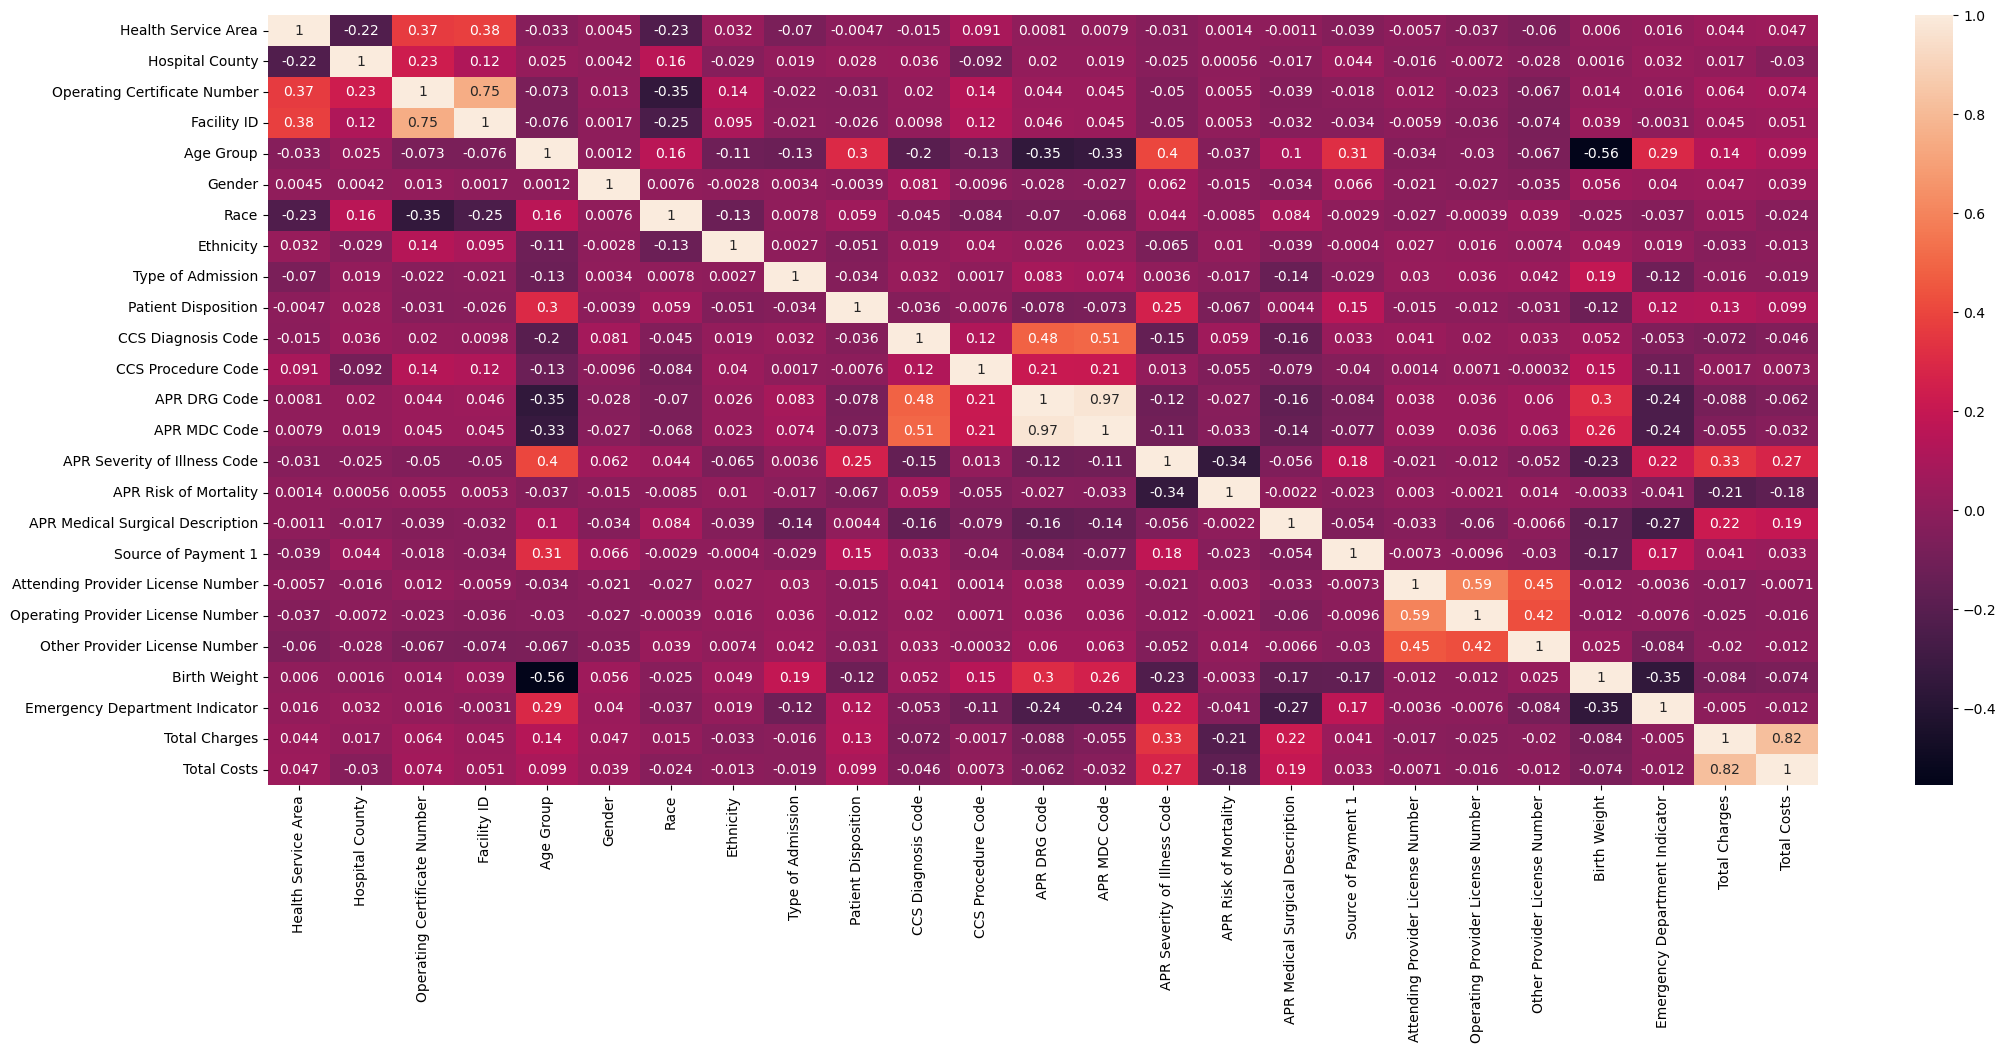

In [36]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True)

In [37]:
data['Length of Stay'].unique()

array(['3', '4', '1', '2', '9', '5', '120 +', '13', '18', '8', '7', '6',
       '11', '15', '17', '25', '16', '47', '20', '37', '12', '19', '27',
       '10', '31', '14', '22', '29', '87', '103', '109', '85', '30', '26',
       '44', '21', '36', '72', '89', '76', '49', '98', '105', '69', '45',
       '32', '57', '24', '39', '81', '33', '28', '23', '77', '88', '63',
       '55', '41', '61', '53', '38', '51', '40', '35', '59', '46', '50',
       '92', '64', '34', '73', '60', '67', '68', '97', '80', '82', '71',
       '95', '113', '118', '54', '91', '100', '115', '90', '42', '108',
       '58', '70', '65', '43', '66', '94', '48', '75', '112', '52', '78',
       '62', '106', '84', '107', '93', '104', '56', '117', '79', '116',
       '83', '74', '96', '86', '114', '110', '99', '102', '101', 27, 4, 2,
       3, 25, 12, 15, 16, 31, 23, 22, 1, 28, 29, 26, 7, 11, 5, 20, 13, 14,
       6, 30, 21, 18, 17, 10, 24, 9, 34, 8, 32, 19, 38, 33, 36, 35, 98,
       50, 51, 55, 66, 43, 77, 84, 41, 40, 91,

In [38]:
data['Zip Code - 3 digits'].unique()

array([100.0, 101.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0,
       110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0,
       119.0, 120.0, 121.0, 122.0, '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '144', '146',
       '147', '148', '149', 'OOS', '120', '121', '100', '101', '104',
       '105', '109', '112', '117', '145', '103', '106', '107', '108',
       '110', '111', '113', '114', '115', '119', '143', '118', '116', 145,
       146, 144, 130.0, 131.0, 132.0], dtype=object)

In [39]:
data.drop(data[(data['Zip Code - 3 digits'] == 'OOS')].index, axis = 0, inplace=True)

In [40]:
data.drop(data[(data['Length of Stay'] == '120 +')].index, axis = 0, inplace=True)

In [41]:
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'])

In [42]:
data['Zip Code - 3 digits'] = pd.to_numeric(data['Zip Code - 3 digits'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535153 entries, 5 to 2617244
Data columns (total 29 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Health Service Area                int32  
 1   Hospital County                    int32  
 2   Operating Certificate Number       float64
 3   Facility ID                        float64
 4   Age Group                          int32  
 5   Zip Code - 3 digits                float64
 6   Gender                             int32  
 7   Race                               int32  
 8   Ethnicity                          int32  
 9   Length of Stay                     int64  
 10  Type of Admission                  int32  
 11  Patient Disposition                int32  
 12  CCS Diagnosis Code                 float64
 13  CCS Procedure Code                 float64
 14  APR DRG Code                       int64  
 15  APR MDC Code                       int64  
 16  APR Severity of Il

In [44]:
x = data.drop(['Source of Payment 2','Source of Payment 3','Source of Payment 1',
               'Operating Provider License Number', 'Other Provider License Number'], axis=1)
y = data['Source of Payment 1']

In [48]:
def Model_Validation(x, y, model):
    x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 42)
    x_test,x_val,y_test,y_val = train_test_split(x_part,y_part,test_size = 0.4,random_state = 42)
    
    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    print('Statistics of Training Dataset:')
    print("Accuracy:", accuracy_score(y_train,pred_train))
    '''
    precision = precision_score(y_train, pred_train)
    print("Precision:", precision)
    recall = recall_score(y_train, pred_train)
    print("Recall:", recall)
    F1_score = f1_score(y_train, pred_train)
    print("F1-score:", F1_score)
    '''
    
    predictions = model.predict(x_val)
    print("\n\n\nStatistics of Validation Dataset:")
    print("Accuracy:", accuracy_score(y_val,predictions))
    '''
    precision2 = precision_score(y_val, predictions)
    print("Precision:", precision2)
    recall2 = recall_score(y_val, predictions)
    print("Recall:", recall2)
    F1_score2 = f1_score(y_val, predictions)
    print("F1-score:", F1_score2)
    '''
    CM = confusion_matrix(y_val, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
    disp.plot()
    plt.show()

In [46]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 02:14:24


Statistics of Training Dataset:
Accuracy: 0.3912359758573319



Statistics of Validation Dataset:
Accuracy: 0.3911547989081557


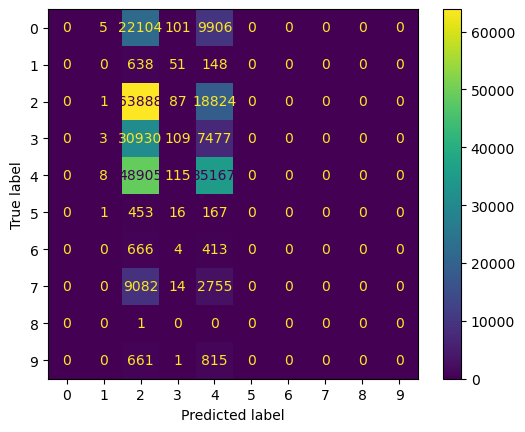

--- 258.7288029193878 seconds ---


In [49]:
import time
start_time = time.time()

lr1 = LogisticRegression()
Model_Validation(x, y, lr1)

print("--- %s seconds ---" % (time.time() - start_time))

Statistics of Training Dataset:
Accuracy: 0.3912359758573319



Statistics of Validation Dataset:
Accuracy: 0.3911547989081557


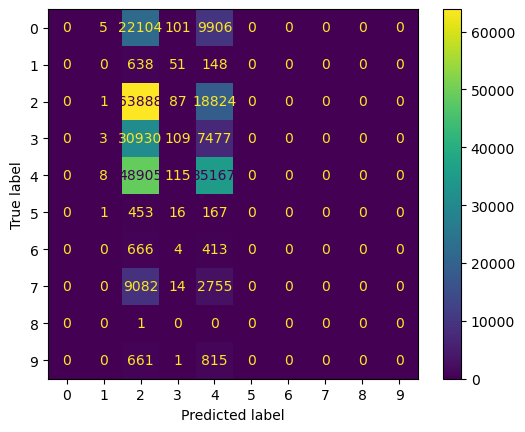

--- 281.10458612442017 seconds ---


In [50]:
start_time = time.time()

dt1 = DecisionTreeClassifier()
Model_Validation(x, y, lr1)

print("--- %s seconds ---" % (time.time() - start_time))